# Importing libraries

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential # class of NN
from keras.layers import Convolution2D # class for adding convulution
from keras.layers import MaxPooling2D # pooling layer class
from keras.layers import Flatten # flatten layer class
from keras.layers import Dense, Dropout # other normal layers in NN
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from joblib import dump, load

In [3]:
os.listdir('datasets')

['test_set', 'training_set']

### Initialising the CNN

In [4]:
classifier = Sequential()

classifier.add(Convolution2D(filters = 16,
                            kernel_size = (5, 5),
                            input_shape = (512, 512, 1),
                            activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(.2))
classifier.add(Convolution2D(filters = 32,
                            kernel_size = (5, 5),
                            activation = 'relu'))

### Adding a second maxpooling layer

In [5]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(.2))

### Flattening

In [6]:
classifier.add(Flatten())

### Full connection

In [7]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

### Compiling the CNN

In [8]:
classifier.compile(optimizer = 'adam',
                    loss = 'binary_crossentropy',
                    metrics = ['accuracy'])

In [9]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 508, 508, 16)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 254, 254, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 254, 254, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 125, 125, 32)      0

In [10]:
def to_grayscale_then_rgb(image):
    # image = tf.image.rgb_to_grayscale(image)
    # image = tf.image.grayscale_to_rgb(image)
    return image

In [11]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                    preprocessing_function = to_grayscale_then_rgb)

test_datagen = ImageDataGenerator(rescale = 1/255, preprocessing_function = to_grayscale_then_rgb)

In [12]:
tr = train_datagen.flow_from_directory(
        'datasets/training_set',
        target_size = (512, 512),
        batch_size = 2,
        class_mode = 'binary',
        color_mode = 'grayscale')

tx = test_datagen.flow_from_directory(
        'datasets/test_set',
        target_size = (512, 512),
        batch_size = 2,
        class_mode = 'binary',
        color_mode = 'grayscale')

Found 200 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [13]:
tr.image_shape

(512, 512, 1)

In [14]:
tx.image_shape

(512, 512, 1)

In [15]:
history = classifier.fit(tr,
                        steps_per_epoch = 5,
                        epochs = 50,
                        validation_data = tx,
                        validation_steps = 20)

Epoch 1/50
5/5 [==============================] - 40s 6s/step - loss: 149.6375 - accuracy: 0.6000 - val_loss: 21.6911 - val_accuracy: 0.4500
Epoch 2/50
5/5 [==============================] - 25s 6s/step - loss: 43.4036 - accuracy: 0.6000 - val_loss: 11.8488 - val_accuracy: 0.5750
Epoch 3/50
5/5 [==============================] - 28s 6s/step - loss: 13.9148 - accuracy: 0.5000 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 4/50
5/5 [==============================] - 27s 6s/step - loss: 0.7444 - accuracy: 0.5000 - val_loss: 0.7002 - val_accuracy: 0.3750
Epoch 5/50
5/5 [==============================] - 27s 6s/step - loss: 0.7209 - accuracy: 0.6000 - val_loss: 0.6929 - val_accuracy: 0.5750
Epoch 6/50
5/5 [==============================] - 34s 8s/step - loss: 0.7003 - accuracy: 0.4000 - val_loss: 0.6929 - val_accuracy: 0.5500
Epoch 7/50
5/5 [==============================] - 54s 12s/step - loss: 0.6910 - accuracy: 0.8000 - val_loss: 0.6933 - val_accuracy: 0.4750
Epoch 8/50
5/5 [===========

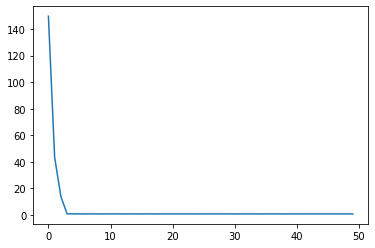

In [16]:
plt.plot(history.history['loss'])

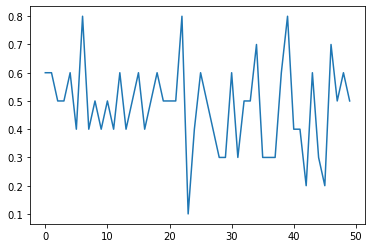

In [17]:
plt.plot(history.history['accuracy'])

In [18]:
classifier.evaluate(tx)

60/60 [==============================] - 55s 909ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931647658348083, 0.5]

In [19]:
model_dict = {
    'title' : 'Handwritting Recognition Model',
    'classifier' : classifier
}

dump(model_dict,"hand_rec_ap.pkl")

INFO:tensorflow:Assets written to: ram://86bc9b24-d765-484e-bb02-aae6bb63acb5/assets


INFO:tensorflow:Assets written to: ram://86bc9b24-d765-484e-bb02-aae6bb63acb5/assets


['hand_rec_ap.pkl']

In [20]:
def load_model():
    filepath = 'hand_rec_ap.pkl'
    return load(filepath)

In [21]:
classifier.save('classifier.h5')

In [22]:
classifier = tf.keras.models.load_model('classifier.h5')

In [23]:
img = tf.keras.utils.load_img(f'D:\Projects\handwritting_recognition_using_cnn\datasets/test_set/Akash/01.jpg',color_mode='grayscale',target_size=(512,512,1))
xinp = tf.keras.utils.img_to_array(img)
np.array([xinp]).shape

(1, 512, 512, 1)

In [24]:
img = tf.keras.utils.load_img(f'D:\Projects\handwritting_recognition_using_cnn\datasets/test_set/Anmol/01.jpg',color_mode='grayscale',target_size=(512,512,1))
xinp = tf.keras.utils.img_to_array(img)
pred = classifier.predict(np.array([xinp]))[0]
print(pred)

1/1 [==============================] - 4s 4s/step
[0.49701586]


In [25]:
if pred < .5:
    print('first person')
else:
    print('second person')

first person


In [27]:
classifier.predict(tx)

60/60 [==============================] - 41s 673ms/step


array([[0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.49701586],
       [0.497

In [ ]:
ans = []
for i in range(11,50):
    img = tf.keras.utils.load_img(f'D:\Projects\handwritting_recognition_using_cnn\datasets/training_set\Akash\{i}.jpg',color_mode='grayscale',target_size=(512,512,1))
    xinp = tf.keras.utils.img_to_array(img)
    pred = classifier.predict(np.array([xinp]))[0]
    print(pred)

    if pred < .5:
        print('first person')
        ans.append(0)
    else:
        print('second person')
        ans.append(1)

1/1 [==============================] - 1s 1s/step
[1.9216622e-30]
first person
1/1 [==============================] - 1s 1s/step
[0.]
first person
1/1 [==============================] - 1s 885ms/step
[0.]
first person
1/1 [==============================] - 1s 928ms/step
[0.]
first person
1/1 [==============================] - 1s 693ms/step
[0.]
first person
1/1 [==============================] - 1s 692ms/step
[0.]
first person
1/1 [==============================] - 1s 595ms/step
[0.]
first person
1/1 [==============================] - 1s 642ms/step
[0.]
first person
1/1 [==============================] - 1s 615ms/step
[0.]
first person
1/1 [==============================] - 1s 1s/step
[0.]
first person
1/1 [==============================] - 1s 736ms/step
[0.]
first person
1/1 [==============================] - 1s 763ms/step
[4.110564e-20]
first person
1/1 [==============================] - 1s 822ms/step
[0.]
first person
1/1 [==============================] - 1s 972ms/step
[0.]
first p

In [ ]:
print(ans)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
ans = []
for i in range(11,50):
    img = tf.keras.utils.load_img(f'D:\Projects\handwritting_recognition_using_cnn\datasets/training_set\Anmol\{i}.jpg',color_mode='grayscale',target_size=(512,512,1))
    xinp = tf.keras.utils.img_to_array(img)
    pred = classifier.predict(np.array([xinp]))[0]
    print(pred)

    if pred < .5:
        print('first person')
        ans.append(0)
    else:
        print('second person')
        ans.append(1)

1/1 [==============================] - 1s 1s/step
[1.]
second person
1/1 [==============================] - 1s 902ms/step
[0.]
first person
1/1 [==============================] - 1s 841ms/step
[0.9999442]
second person
1/1 [==============================] - 1s 752ms/step
[1.]
second person
1/1 [==============================] - 1s 611ms/step
[0.0013564]
first person
1/1 [==============================] - 1s 614ms/step
[4.028442e-06]
first person
1/1 [==============================] - 1s 560ms/step
[0.]
first person
1/1 [==============================] - 1s 693ms/step
[1.]
second person
1/1 [==============================] - 1s 760ms/step
[0.35855067]
first person
1/1 [==============================] - 1s 967ms/step
[6.073611e-11]
first person
1/1 [==============================] - 0s 498ms/step
[1.]
second person
1/1 [==============================] - 0s 448ms/step
[0.8312011]
second person
1/1 [==============================] - 0s 493ms/step
[3.071763e-11]
first person
1/1 [==========

In [ ]:
print(ans)

[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0]
